# Prédiction de la valence d'un commentaire

auteur : Alexandre Gramfort, challenge SD207 2015-2016

L'objectif est de prédire la valence d'un commentaire sur un site web. Est-ce un commentaire injurieux ou non?

Il s'agit d'un problème classification binaire qui prend en entrée du texte brut.

### Critère de performance

Le critère de performance retenu pour l'évaluation de ce modèle est l'accuracy (pourcentage de bonnes predictions).

Données d'apprentissage: https://dl.dropboxusercontent.com/u/2140486/challenges/text/train.csv

Données de validation: https://dl.dropboxusercontent.com/u/2140486/challenges/text/test.csv

Vous trouverez ci-dessous un exemple de prédiction sur ces données.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_fname = 'train.csv'
test_fname = 'test.csv'

In [4]:
!head -3 train.csv

0,"""Imagine being able say, you know what, no sanctions, no forever hearings on IEAA regulations, no more hiding\xa0under\xa0the pretense of friendly nuclear energy. \xa0You have 2 days to; \xa0i.e. \xa0let in the inspectors, quit killing the civilians, respect the border and rights of your neighboring country, \xa0or we ( whoever we are) will shut off your nuclear plant, your monitoring system and whatever else we fancy, like your water\xa0treatment\xa0plants and early warning sandstorm system and the traffic lights of all major cities...\xa0\nand yes..( pinky finger to lip edge) so your teenagers revolt and topple your regime... \xa0disconnect ... FACEBOOK.... buwhahjahahaha."""
0,"""""But Jack from Raleigh wasn't done. He came back with this bit of furious grammatical genius:""\n""Holy hell, Jack. Calm down.""\n\nGOD D@MN HILARIOUS!\n\nWho writes your material GraziD?  \n\nMM never even acknowledged we were here (well accept when Uber ticked him off)  GraziD not only interacts with

In [5]:
!head -3 test.csv

"""Where's all the Ron Paul trolls, to defend this\xa0piece of shit?"""
"""Thanks for your comment. Of course, I don't mind. Cute away."""
"""At this moment your toes are touching each other."""


Read train data

In [6]:
X = []
y = []
with open(train_fname) as f:
    for line in f:
        y.append(int(line[0]))
        X.append(line[5:-6])
y = np.array(y)

print('n_samples : %d' % len(X))

n_samples : 4415


In [7]:
X[:2]

['Imagine being able say, you know what, no sanctions, no forever hearings on IEAA regulations, no more hiding\\xa0under\\xa0the pretense of friendly nuclear energy. \\xa0You have 2 days to; \\xa0i.e. \\xa0let in the inspectors, quit killing the civilians, respect the border and rights of your neighboring country, \\xa0or we ( whoever we are) will shut off your nuclear plant, your monitoring system and whatever else we fancy, like your water\\xa0treatment\\xa0plants and early warning sandstorm system and the traffic lights of all major cities...\\xa0\\nand yes..( pinky finger to lip edge) so your teenagers revolt and topple your regime... \\xa0disconnect ... FACEBOOK.... buwhahjahahah',
 '""But Jack from Raleigh wasn\'t done. He came back with this bit of furious grammatical genius:""\\n""Holy hell, Jack. Calm down.""\\n\\nGOD D@MN HILARIOUS!\\n\\nWho writes your material GraziD?  \\n\\nMM never even acknowledged we were here (well accept when Uber ticked him off)  GraziD not only inte

In [8]:
print("Le taux de prédiction au niveau de la chance est : %s" % np.mean(y == 0))

Le taux de prédiction au niveau de la chance est : 0.694450736127


Read test data

In [9]:
X_test = []
with open(test_fname) as f:
    for line in f:
        X_test.append(line[3:-6])

print('n_samples_test : %d' % len(X_test))

n_samples_test : 4414


In [10]:
X_test[:2]

["Where's all the Ron Paul trolls, to defend this\\xa0piece of shi",
 "Thanks for your comment. Of course, I don't mind. Cute awa"]

Extraction d'une feature (très naive?) basée sur la longeur des commentaires

In [11]:
char_counts = np.array([len(x) for x in X])

Un peu d'exploration avec Pandas

In [12]:
import pandas as pd
df = pd.DataFrame(dict(label=y, char_counts=char_counts))
df.head(5)

,char_counts,label
0,680,0
1,365,0
2,171,0
3,37,0
4,177,0


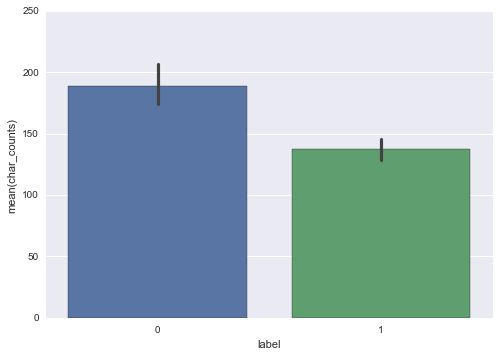

In [15]:
import seaborn as sns
ax = sns.barplot(x="label", y="char_counts", data=df)

On voit qu'il y a une légere différence de longueur des commentaires en fonction de y.

Exraction des features sur le test

In [16]:
char_counts_test = np.array([len(x) for x in X_test])
y_pred = (char_counts_test < 60).astype(np.int)

In [15]:
np.savetxt('y_pred.txt', y_pred, fmt='%s')

In [16]:
!head y_pred.txt

0
1
1
0
0
0
1
0
1
1


Vous pouvez maintenant uploader votre fichier `y_pred.txt` sur le site.

Bonne chance !